<a href="https://colab.research.google.com/github/aryo14781470/UAS/blob/master/Prediksi_Welfare_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import package penting

# untuk model machine learning
from tensorflow import lite
import tensorflow as tf

import matplotlib.pyplot as plt

# untuk processing suara
import sklearn
import librosa
import librosa.display

# untuk download dataset dari github
import zipfile
import os

# untuk general use
import pandas as pd
import numpy as np
import json
# from pathlib import Path # untuk buka current working directory

# Preprocessing dataset

In [ ]:
# hapus folder dataset sebelumnya
!rm -rf "/content/dataset"
# download dataset dari github, simpan di cwd (/content)
!wget --no-check-certificate \
    "https://github.com/fawwazanvilen/Dataset-Vokalisasi-Ayam/archive/refs/heads/main.zip" \
    -O "/content/dataset.zip"

# ekstrak dataset di cwd (/content)
zip_ref = zipfile.ZipFile("/content/dataset.zip", "r") # buka file zip dalam mode read
zip_ref.extractall("/content") # ekstrak dataset di cwd
zip_ref.close()

# pindah dataset ke cwd
!mv "/content/Dataset-Vokalisasi-Ayam-main/dataset" "/content/dataset"
!rm -rf "/content/Dataset-Vokalisasi-Ayam-main"

--2022-06-12 06:10:10--  https://github.com/fawwazanvilen/Dataset-Vokalisasi-Ayam/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/fawwazanvilen/Dataset-Vokalisasi-Ayam/zip/refs/heads/main [following]
--2022-06-12 06:10:10--  https://codeload.github.com/fawwazanvilen/Dataset-Vokalisasi-Ayam/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/dataset.zip’

/content/dataset.zi     [     <=>            ]  12.27M  12.0MB/s    in 1.0s    

2022-06-12 06:10:11 (12.0 MB/s) - ‘/content/dataset.zip’ saved [12868262]



In [ ]:
# bikin file metadata
dataset_path = "/content/dataset"
json_path = "data.json"

# dictionary untuk menyimpan hasil mapping, label, MFCC, dan files
data = {
    "mapping": [],
    "labels": [],
    "MFCCs": [],
    "files": []
}

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
  # print(i, (dirpath, dirnames, filenames)) # mau ngecek apa yang terjadi
  if dirpath is not dataset_path:

    # masukkan path directory saat ini (yang bukan dataset_path, tapi level bawahnya)
    # sebagai mapping dalam dictionary (label dalam bentuk numerik)
    label = dirpath.split("/")[-1]
    data["mapping"].append(label)
    print("\nProcessing: '{}'".format(label))

    # proses semua file audio di subdir dataset (happy, unhappy, greeting)
    for f in filenames:
      file_path = os.path.join(dirpath, f)
      
      # load file audio dan potong untuk memastikan panjang file audio konsisten
      signal, sample_rate = librosa.load(file_path)

      # sample_rate di dataset adalah 22050 Hz
      # jumlah kanal di semua file audio adalah mono (bukan stereo), tidak perlu pemrosesan lagi
      # print(sample_rate) # cek sample rate, untuk coba-coba (ternyata 22050 Hz semua)
      # print(signal.shape) # cek apakah audio-nya mono/stereo (ternyata mono semua)

      # supaya panjang file audio konsisten, semua file audio dioverlay dengan suara diam
      # selama durasi tertentu
      # durasi yang digunakan adalah 12 detik (12 kali sample_rate)
      # karena data dengan durasi terpanjang dalam dataset adalah 12 detik
      padding_array = np.zeros(12*sample_rate, dtype=float) # padding_array isi nol
      signal.resize(padding_array.shape, refcheck=False)
      signal = signal + padding_array

      # drop file audio dengan jumlah sampel lebih sedikit dari durasi tertentu
      # ambil durasi 4 detik (cek dulu)
      if len(signal) >= 4*sample_rate:

          # ensure consistency of the length of the signal
          signal = signal[:4*sample_rate]

          # extract MFCCs
          num_mfcc=13
          n_fft=2048
          hop_length=512
          MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                        hop_length=hop_length)

          # store data for analysed track
          data["MFCCs"].append(MFCCs.T.tolist())
          data["labels"].append(i-1)
          data["files"].append(file_path)
          print("{}: {}".format(file_path, i-1))

    # save data in json file
    with open(json_path, "w") as fp:
      json.dump(data, fp, indent=4)


Processing: 'Greeting'
/content/dataset/Greeting/Whats_Up1.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me10.wav: 0
/content/dataset/Greeting/Whats_Up3.wav: 0
/content/dataset/Greeting/Whats_Up2.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me12.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me20.wav: 0
/content/dataset/Greeting/Whats_Up6.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me6.wav: 0
/content/dataset/Greeting/Whats_Up8.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me11.wav: 0
/content/dataset/Greeting/Hello.wav: 0
/content/dataset/Greeting/Whats_Up7.wav: 0
/content/dataset/Greeting/Whats_Up5.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me3.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me19.wav: 0
/content/dataset/Greeting/Whats_Up4.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me5.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me7.wav: 0
/content/dataset/Greeting/Do_You_Have_Food_For_Me4.wav: 0
/content

# Bikin Model

Training sets loaded!
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 171, 11, 128)      1280      
                                                                 
 batch_normalization_9 (Batc  (None, 171, 11, 128)     512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 86, 6, 128)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 84, 4, 64)         73792     
                                                                 
 batch_normalization_10 (Bat  (None, 84, 4, 64)        256       
 chNormalization)                                                
                                

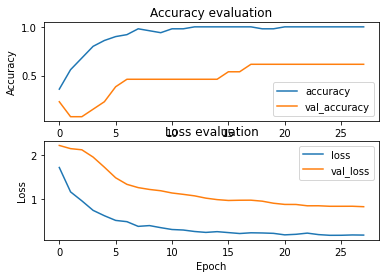

1/1 [==============================] - 0s 57ms/step - loss: 0.8405 - accuracy: 0.7500

Test loss: 0.840488612651825, test accuracy: 75.0


In [ ]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

DATA_PATH = "data.json"
SAVED_MODEL_PATH = "model.h5"
EPOCHS = 70
BATCH_SIZE = 8
PATIENCE = 15
LEARNING_RATE = 0.0001


def load_data(data_path):
    """Loads training dataset from json file.
    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    print("Training sets loaded!")
    return X, y


def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):
    """Creates train, validation and test sets.
    :param data_path (str): Path to json file containing data
    :param test_size (flaot): Percentage of dataset used for testing
    :param validation_size (float): Percentage of train set used for cross-validation
    :return X_train (ndarray): Inputs for the train set
    :return y_train (ndarray): Targets for the train set
    :return X_validation (ndarray): Inputs for the validation set
    :return y_validation (ndarray): Targets for the validation set
    :return X_test (ndarray): Inputs for the test set
    :return X_test (ndarray): Targets for the test set
    """

    # load dataset
    X, y = load_data(data_path)

    # create train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to nd array
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, y_train, X_validation, y_validation, X_test, y_test


def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.0001):
    """Build neural network using keras.
    :param input_shape (tuple): Shape of array representing a sample train. E.g.: (44, 13, 1)
    :param loss (str): Loss function to use
    :param learning_rate (float):
    :return model: TensorFlow model
    """

    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    tf.keras.layers.Dropout(0.1)

    # softmax output layer
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model


def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    """Trains model
    :param epochs (int): Num training epochs
    :param batch_size (int): Samples per batch
    :param patience (int): Num epochs to wait before early stop, if there isn't an improvement on accuracy
    :param X_train (ndarray): Inputs for the train set
    :param y_train (ndarray): Targets for the train set
    :param X_validation (ndarray): Inputs for the validation set
    :param y_validation (ndarray): Targets for the validation set
    :return history: Training history
    """

    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()


def main():
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape, learning_rate=LEARNING_RATE)

    # train network
    history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

    # plot accuracy/loss for training/validation set as a function of the epochs
    plot_history(history)

    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

    # save model
    model.save(SAVED_MODEL_PATH)

    
    
if __name__ == "__main__":
    main()

# Prediksi Model

In [ ]:
import librosa
import tensorflow as tf
import numpy as np

SAVED_MODEL_PATH = "model.h5"
#SAMPLES_TO_CONSIDER = 22050 # ga diperlukan

class _Keyword_Spotting_Service:
    """Singleton class for keyword spotting inference with trained models.
    :param model: Trained model
    """

    model = None
    # _mapping = [
    #     "happy",
    #     "greeting",
    #     "unhappy"
    # ]
    _mapping = [
        "greeting",
        "happy",
        "unhappy"
    ]
    _instance = None


    def predict(self, file_path):
        """
        :param file_path (str): Path to audio file to predict
        :return predicted_keyword (str): Keyword predicted by the model
        """

        # extract MFCC
        MFCCs = self.preprocess(file_path)

        # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # get the predicted label
        predictions = self.model.predict(MFCCs)
        print(predictions)
        predicted_index = np.argmax(predictions)
        print(predicted_index)
        predicted_keyword = self._mapping[predicted_index]
        return predicted_keyword


    def preprocess(self, file_path, num_mfcc=13, n_fft=2048, hop_length=512):
        """Extract MFCCs from audio file.
        :param file_path (str): Path of audio file
        :param num_mfcc (int): # of coefficients to extract
        :param n_fft (int): Interval we consider to apply STFT. Measured in # of samples
        :param hop_length (int): Sliding window for STFT. Measured in # of samples
        :return MFCCs (ndarray): 2-dim array with MFCC data of shape (# time steps, # coefficients)
        """

        # # load audio file
        # signal, sample_rate = librosa.load(file_path)

        # if len(signal) >= SAMPLES_TO_CONSIDER:
        #     # ensure consistency of the length of the signal
        #     signal = signal[:SAMPLES_TO_CONSIDER]

        #     # extract MFCCs
        #     MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
        #                                  hop_length=hop_length)
            
        # load file audio dan potong untuk memastikan panjang file audio konsisten
        signal, sample_rate = librosa.load(file_path)

        # sample_rate di dataset adalah 22050 Hz
        # jumlah kanal di semua file audio adalah mono (bukan stereo), tidak perlu pemrosesan lagi
        # print(sample_rate) # cek sample rate, untuk coba-coba (ternyata 22050 Hz semua)
        # print(signal.shape) # cek apakah audio-nya mono/stereo (ternyata mono semua)

        # supaya panjang file audio konsisten, semua file audio dioverlay dengan suara diam
        # selama durasi tertentu
        # durasi yang digunakan adalah 12 detik (12 kali sample_rate)
        # karena data dengan durasi terpanjang dalam dataset adalah 12 detik
        padding_array = np.zeros(12*sample_rate, dtype=float) # padding_array isi nol
        signal.resize(padding_array.shape, refcheck=False)
        signal = signal + padding_array

        # drop audio files with less than pre-decided number of samples
        # drop file audio dengan jumlah sampel lebih sedikit dari durasi tertentu
        # ambil durasi 4 detik (cek dulu)
        if len(signal) >= 4*sample_rate:

            # ensure consistency of the length of the signal
            signal = signal[:4*sample_rate]

            # extract MFCCs
            num_mfcc=13
            n_fft=2048
            hop_length=512
            MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                        hop_length=hop_length)
        return MFCCs.T


def Keyword_Spotting_Service():
    """Factory function for Keyword_Spotting_Service class.
    :return _Keyword_Spotting_Service._instance (_Keyword_Spotting_Service):
    """

    # ensure an instance is created only the first time the factory function is called
    if _Keyword_Spotting_Service._instance is None:
        _Keyword_Spotting_Service._instance = _Keyword_Spotting_Service()
        _Keyword_Spotting_Service.model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    return _Keyword_Spotting_Service._instance


if __name__ == "__main__":

    # create 2 instances of the keyword spotting service
    kss = Keyword_Spotting_Service()
    kss1 = Keyword_Spotting_Service()

    # check that different instances of the keyword spotting service point back to the same object (singleton)
    assert kss is kss1

    # make a prediction
    keyword = kss.predict("/content/dataset/Happy/Egg_Song1.wav")
    #keyword = kss.predict("/content/dataset/Unhappy/I_Need_A_Nest_Box1.wav")
    #keyword = kss.predict("/content/dataset/Greeting/Whats_Up2.wav")
    print(keyword)

In [ ]:
# coba satu-satu
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
  # print(i, (dirpath, dirnames, filenames)) # mau ngecek apa yang terjadi
  if dirpath is not dataset_path:

    # masukkan path directory saat ini (yang bukan dataset_path, tapi level bawahnya)
    # sebagai mapping dalam dictionary (label dalam bentuk numerik)
    label = dirpath.split("/")[-1]
    data["mapping"].append(label)
    print("\nProcessing: '{}'".format(label))

    # proses semua file audio di subdir dataset (happy, unhappy, greeting)
    for f in filenames:
      file_path = os.path.join(dirpath, f)
      keyword = kss.predict(file_path)
      print(keyword)

In [ ]:
# augmentasi audio, bisa pakai frequency/time shift

In [ ]:
# ubah ke mel spectogram, pakai mfcc

In [ ]:
# augmentasi spectogram (?)

In [ ]:
# bikin model
# training model, cek performansi

In [ ]:
# coba model untuk prediksi